In [26]:
import numpy as np
import matplotlib.pyplot as plt

## Generating and plotting the signals

In [27]:
# Signal parameters
fs_high = 1000  # High sampling frequency (Hz)
t_high = np.arange(0, 1, 1/fs_high)  # Time vector from 0 to 1 second

# Component frequencies
f1 = 50   # Frequency of 50 Hz
f2 = 120  # Frequency of 120 Hz

# High-resolution signal
signal_high = np.sin(2*np.pi*f1*t_high) + 0.5*np.sin(2*np.pi*f2*t_high)


In [28]:
fs_low = 300  # Low sampling frequency (Hz)
t_low = np.arange(0, 1, 1/fs_low)  # Time vector from 0 to 1 second

# Low-resolution signal
signal_low = np.sin(2*np.pi*f1*t_low) + 0.5*np.sin(2*np.pi*f2*t_low)


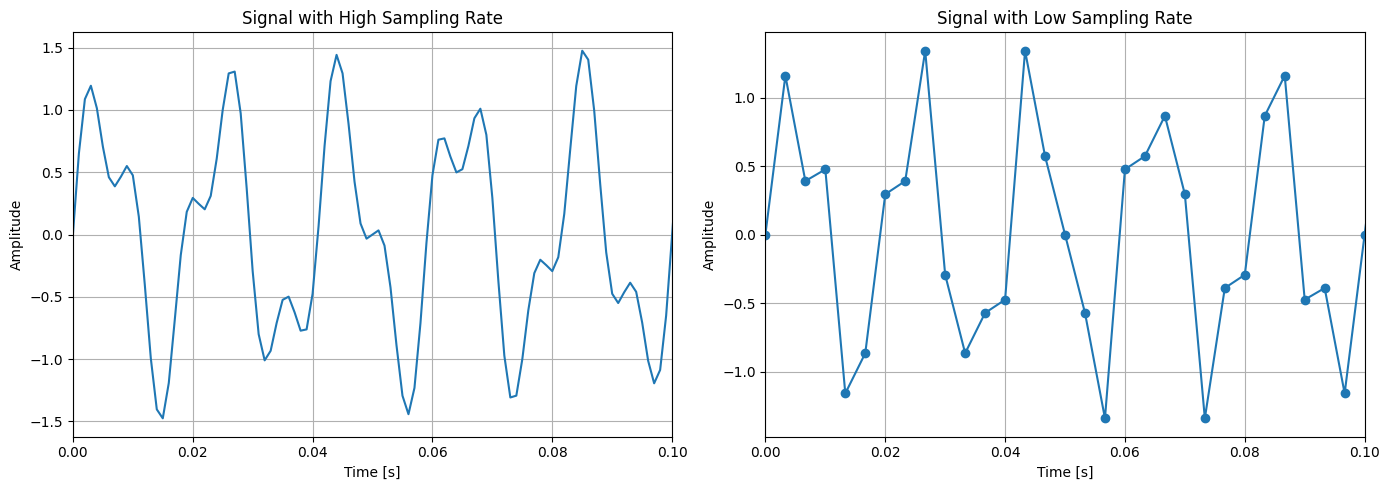

In [29]:
plt.figure(figsize=(14, 5))

# Plot high sampling rate signal
plt.subplot(1, 2, 1)
plt.plot(t_high, signal_high)
plt.title('Signal with High Sampling Rate')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)  # Zoom in on the first 100 ms
plt.grid(True)

# Plot low sampling rate signal
plt.subplot(1, 2, 2)
plt.plot(t_low, signal_low, 'o-')
plt.title('Signal with Low Sampling Rate')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)  # Zoom in on the first 100 ms
plt.grid(True)

plt.tight_layout()
plt.show()


## Visualizing the FFTs

In [30]:
# FFT for high sampling rate signal
N_high = len(signal_high)
fft_high = np.fft.fft(signal_high)
fft_high = fft_high[0:N_high//2]  # Take only the positive half
freq_high = np.fft.fftfreq(N_high, d=1/fs_high)
freq_high = freq_high[0:N_high//2]

# FFT for low sampling rate signal
N_low = len(signal_low)
fft_low = np.fft.fft(signal_low)
fft_low = fft_low[0:N_low//2]
freq_low = np.fft.fftfreq(N_low, d=1/fs_low)
freq_low = freq_low[0:N_low//2]


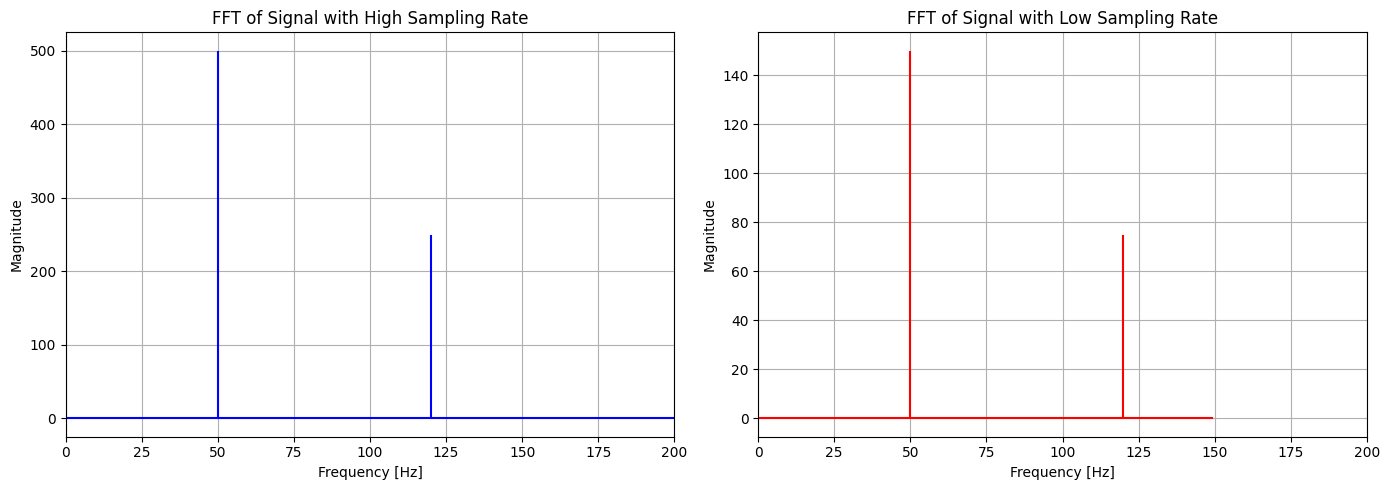

In [31]:
plt.figure(figsize=(14, 5))

# FFT of high-resolution signal
plt.subplot(1, 2, 1)
plt.stem(freq_high, np.abs(fft_high), 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of Signal with High Sampling Rate')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 200)
plt.grid(True)

# FFT of low-resolution signal
plt.subplot(1, 2, 2)
plt.stem(freq_low, np.abs(fft_low), 'r', markerfmt=" ", basefmt="-r")
plt.title('FFT of Signal with Low Sampling Rate')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 200)
plt.grid(True)

plt.tight_layout()
plt.show()


## Conclusion

Despite the second signal having a much lower sample rate the fft still picks out the correct frequencies. This is because the smaller sample rate still obeys Nyquist and doesn't lose any frequency information.